                                                INTERN NAME : ASHUTOSH MAURYA
    TASK : Email Spam Detection Using Python
    INTERNSHIP NAME: DATA SCIENCE
    INTERNSHIP PROVIDER: CoderCave
                                                MAY-2023

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [13]:
df=pd.read_csv("spam_ham_dataset.csv")

In [14]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [15]:
df.shape

(5171, 4)

### 1.) Data Cleaning

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [17]:
# reanaming the column
df.rename(columns={'label':'Target'},inplace=True)

In [18]:
df.sample()

,Unnamed: 0,Target,text,label_num
1996,1094,ham,Subject: july 2000 co - owner ' s volumes\r\nj...,0


In [19]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Target,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [20]:
df.drop(columns=['Target'],inplace=True)
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [21]:
#missing value
df.isnull().sum()


text         0
label_num    0
dtype: int64

In [22]:
# check for duplicate value
df.duplicated().sum()

178

In [23]:
#remove duplicated value
df= df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [24]:
df.shape

(4993, 2)

### 2.) EDA

In [25]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [26]:
df['label_num'].value_counts()

0    3531
1    1462
Name: label_num, dtype: int64

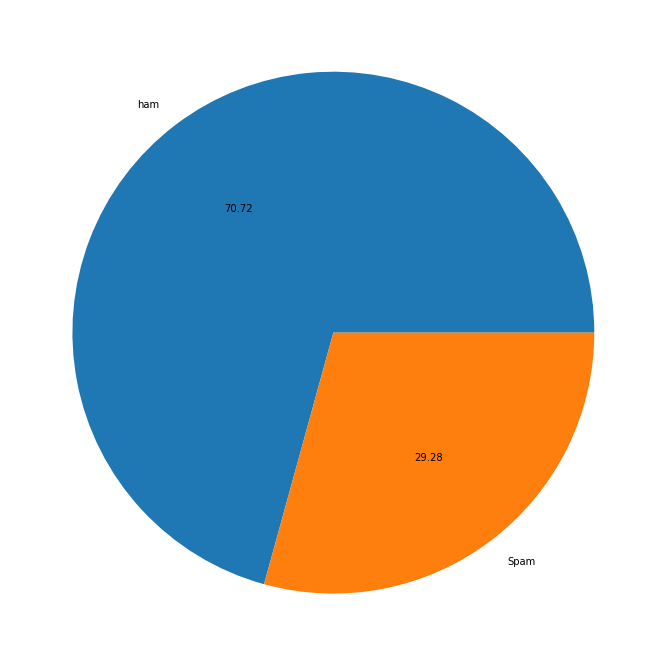

In [27]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,12)
plt.pie(df['label_num'].value_counts(), labels=['ham','Spam'],autopct="%0.2f")
plt.show()

#data is imbalnced

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [30]:
df['num_characters']=df['text'].apply(len)

In [31]:
df.head()

,text,label_num,num_characters
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs\r\nthis deal is t...,0,336


In [32]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df.head()

,text,label_num,num_characters,num_words
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [34]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,text,label_num,num_characters,num_words,num_sentences
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [36]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [37]:
#Spam
df[df['label_num'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


In [38]:
#Ham
df[df['label_num'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


<AxesSubplot:xlabel='num_words', ylabel='Count'>

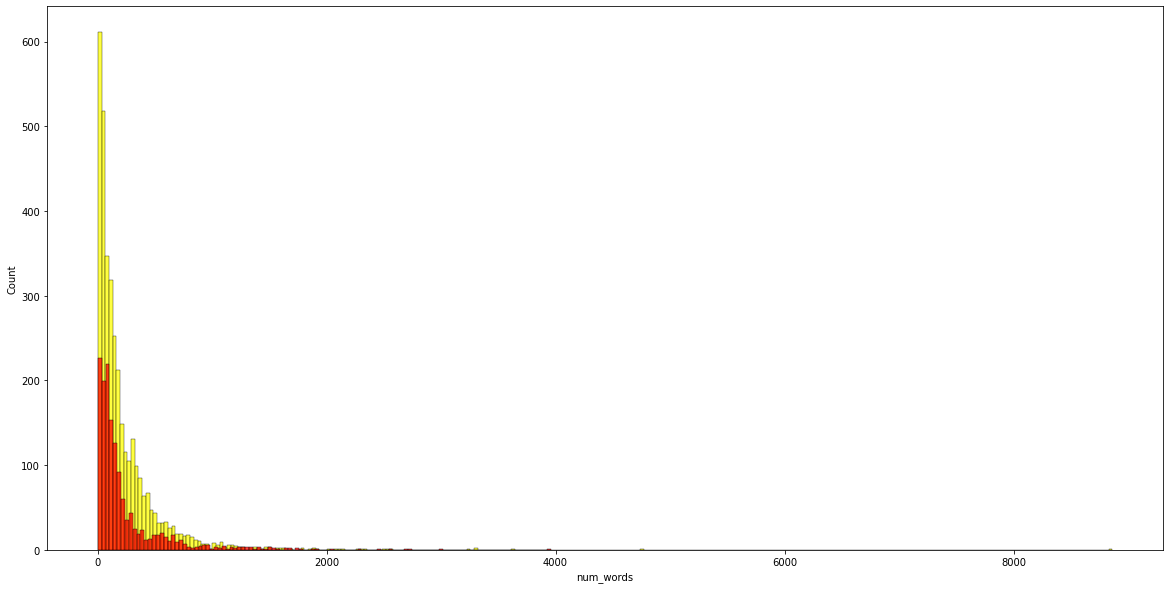

In [39]:
plt.figure(figsize=(20,10))
sns.histplot(df[df['label_num'] == 0]['num_words'],color='yellow')
sns.histplot(df[df['label_num'] == 1]['num_words'],color='red')

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

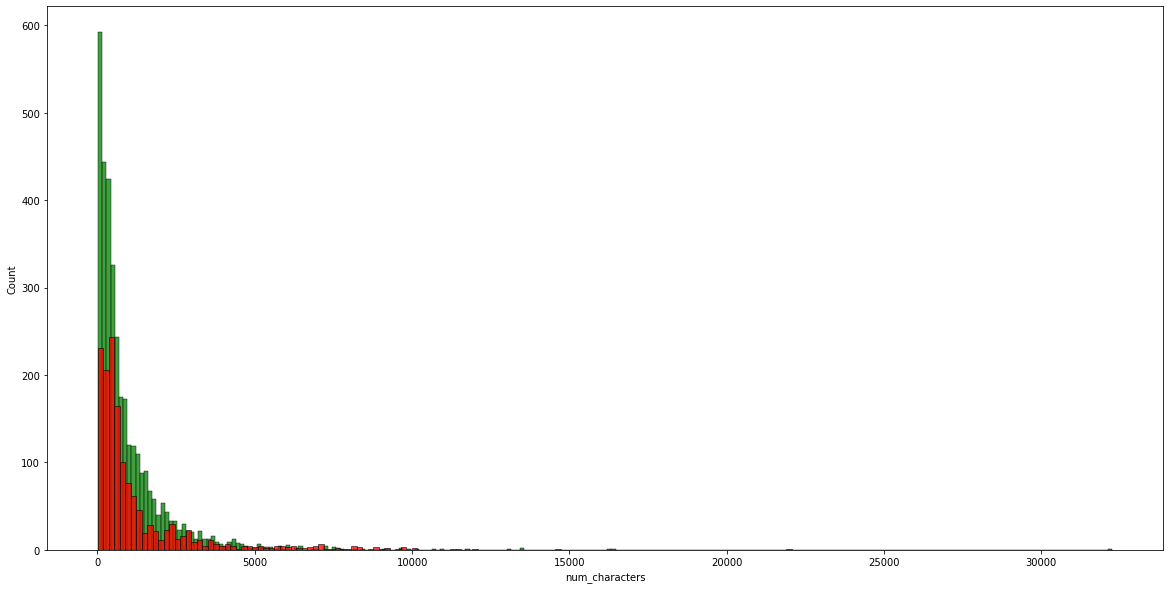

In [40]:
plt.figure(figsize=(20,10))
sns.histplot(df[df['label_num'] == 0]['num_characters'],color='green')
sns.histplot(df[df['label_num'] == 1]['num_characters'],color='red')

<Figure size 1440x1080 with 0 Axes>

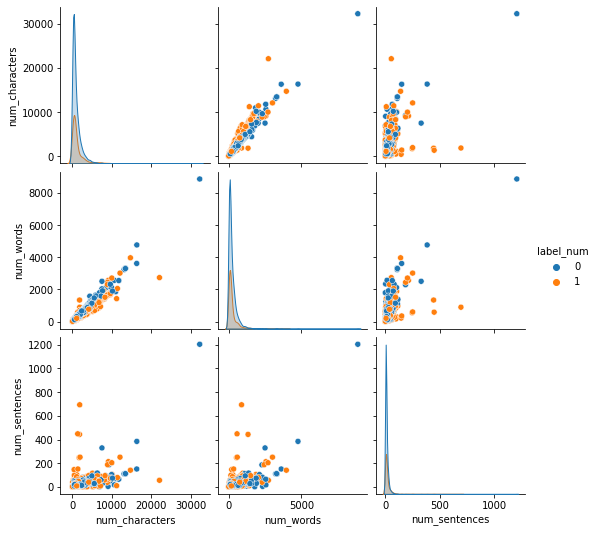

In [41]:
plt.figure(figsize=(20,15))
sns.pairplot(df,hue='label_num')

<AxesSubplot:>

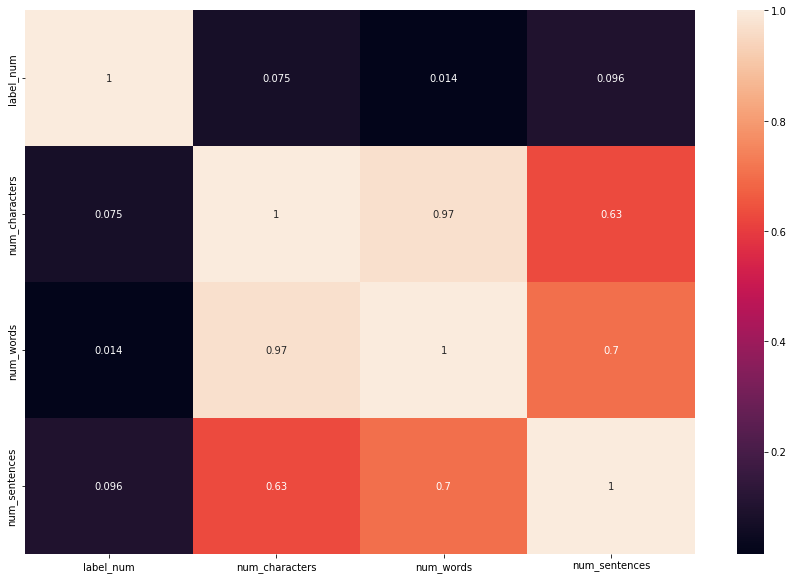

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

### 3. Data Preprocessing

    Lower case
    Tokenization
    Remove Special Characters
    Remove Stop words and punctuation
    Stemming

In [43]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_te(text):
    text = text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

            
    return" ".join(y)

In [44]:
transform_te("Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .")

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [45]:
df['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [46]:
df['Transformed Text']=df['text'].apply(transform_te)

In [47]:
df.head(6)

,text,label_num,num_characters,num_words,num_sentences,Transformed Text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...
5,Subject: ehronline web address change\r\nthis ...,0,480,99,7,subject ehronlin web address chang messag inte...


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=3000,height=3000,min_font_size=10,background_color='white')

In [49]:
spam_wc=wc.generate(df[df['label_num'] == 1]['Transformed Text'].str.cat(sep=' '))

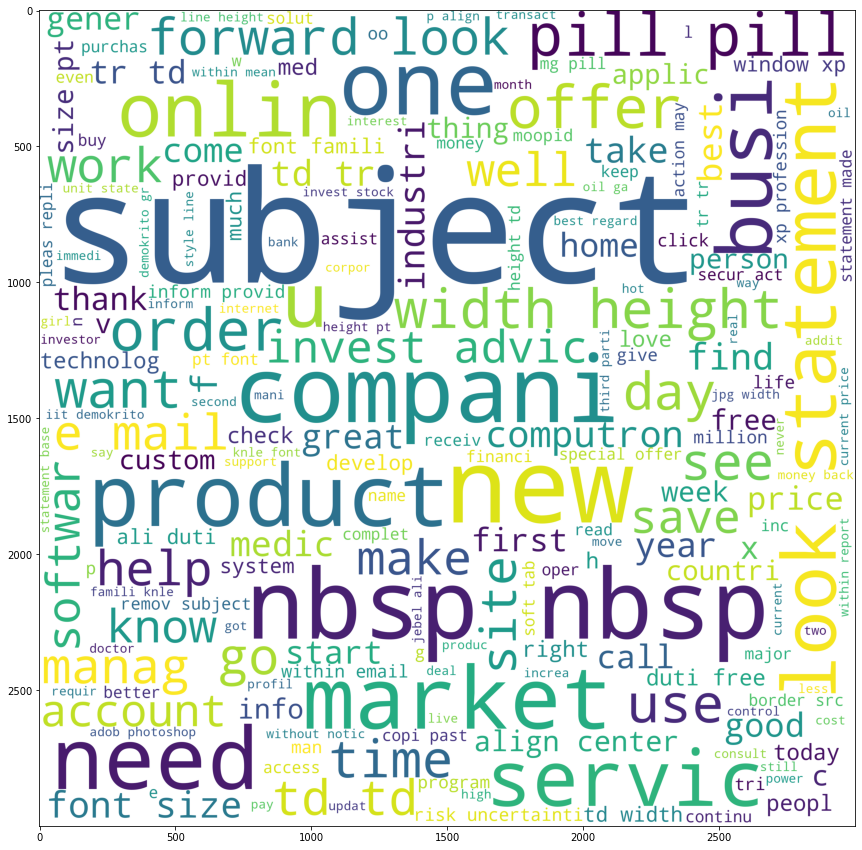

In [50]:
plt.figure(figsize=(15,15))
plt.imshow(spam_wc)

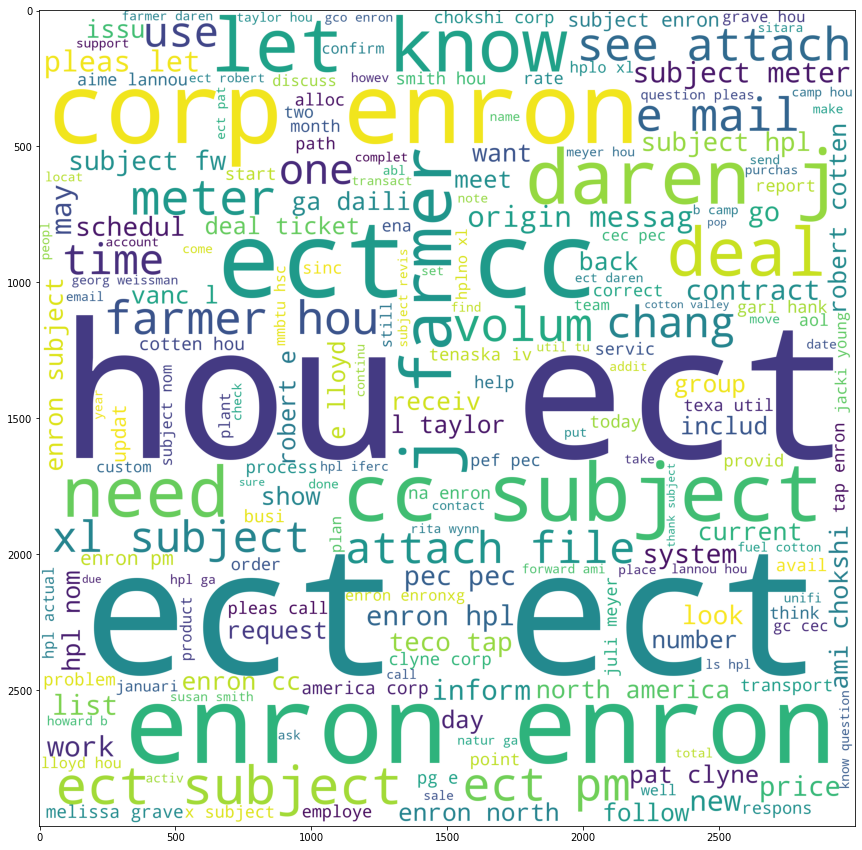

In [51]:
ham_wc=wc.generate(df[df['label_num'] == 0]['Transformed Text'].str.cat(sep=' '))
plt.figure(figsize=(15,15))
plt.imshow(ham_wc)

In [52]:
df.head()

,text,label_num,num_characters,num_words,num_sentences,Transformed Text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [53]:
spam_corpus=[]
for msg in df[df['label_num']==1]['Transformed Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

196592

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


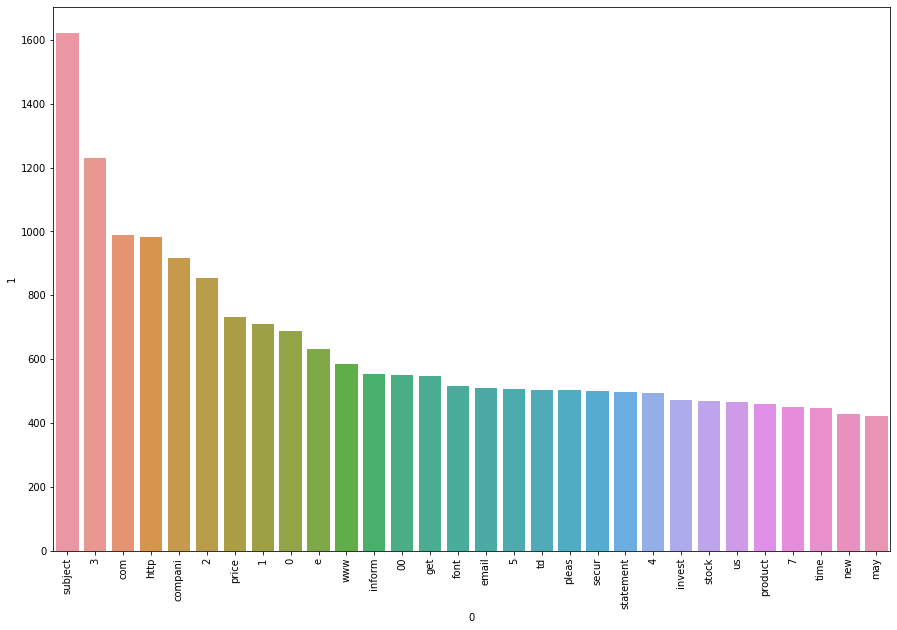

In [55]:
from collections import Counter
plt.figure(figsize=(15,10))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
ham_corpus=[]
for msg in df[df['label_num']==0]['Transformed Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

380475

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


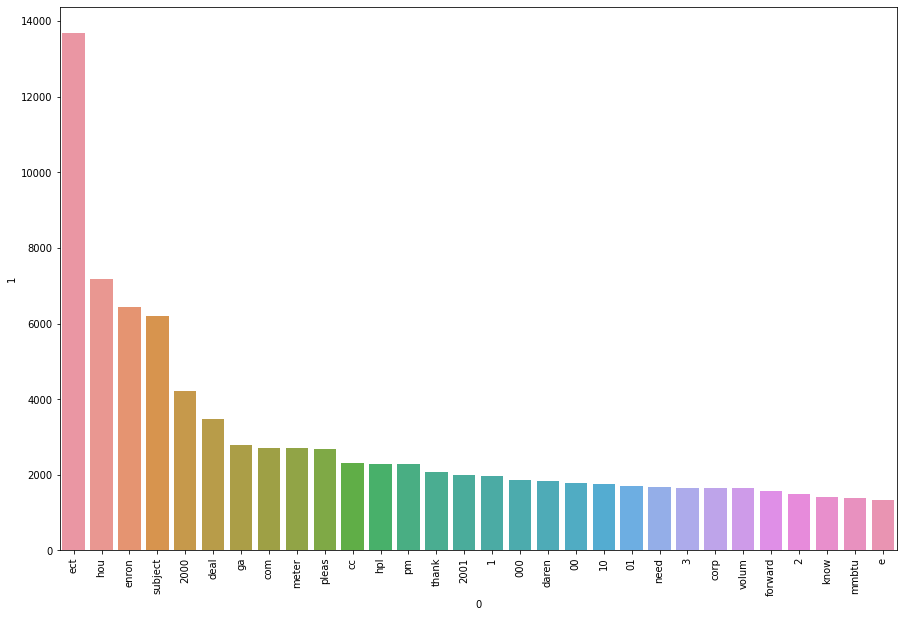

In [58]:
plt.figure(figsize=(15,10))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### 4.) Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
Tfidf=TfidfVectorizer()

In [60]:
X= Tfidf.fit_transform(df['Transformed Text']).toarray()

In [61]:
X.shape

(4993, 42592)

In [62]:
y=df['label_num'].values 

In [63]:
y


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
gnb= GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [68]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9409409409409409
[[669  28]
 [ 31 271]]
0.9063545150501672


In [69]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.908908908908909
[[696   1]
 [ 90 212]]
0.9953051643192489


In [70]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8468468468468469
[[677  20]
 [133 169]]
0.8941798941798942


# tfidf  -->> MNB

In [71]:
svc = SVC(kernel='sigmoid', gamma=1.0)                        ### OBJECT
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc= BaggingClassifier(n_estimators=50, random_state= 2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb= XGBClassifier(n_estimators=50, random_state=2)

In [72]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [73]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [74]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.984984984984985, 0.9555555555555556)

In [75]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.984984984984985
Precision -  0.9555555555555556
For  KN
Accuracy -  0.9579579579579579
Precision -  0.9676258992805755
For  NB
Accuracy -  0.908908908908909
Precision -  0.9953051643192489
For  DT
Accuracy -  0.8518518518518519
Precision -  0.8235294117647058
For  LR
Accuracy -  0.9579579579579579
Precision -  0.891566265060241
For  RF
Accuracy -  0.975975975975976
Precision -  0.9512987012987013
For  AdaBoost
Accuracy -  0.9479479479479479
Precision -  0.8955696202531646
For  BgC
Accuracy -  0.9529529529529529
Precision -  0.9047619047619048
For  ETC
Accuracy -  0.97997997997998
Precision -  0.9519230769230769
For  GBDT
Accuracy -  0.9279279279279279
Precision -  0.9197080291970803
For  xgb
Accuracy -  0.968968968968969
Precision -  0.916923076923077


In [76]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [77]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.908909,0.995305
1,KN,0.957958,0.967626
0,SVC,0.984985,0.955556
8,ETC,0.979980,0.951923
5,RF,0.975976,0.951299
9,GBDT,0.927928,0.919708
10,xgb,0.968969,0.916923
7,BgC,0.952953,0.904762
6,AdaBoost,0.947948,0.895570
4,LR,0.957958,0.891566


In [78]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [79]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [80]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.908909
1,KN,Accuracy,0.957958
2,SVC,Accuracy,0.984985
3,ETC,Accuracy,0.979980
4,RF,Accuracy,0.975976
5,GBDT,Accuracy,0.927928
6,xgb,Accuracy,0.968969
7,BgC,Accuracy,0.952953
8,AdaBoost,Accuracy,0.947948
9,LR,Accuracy,0.957958


<Figure size 1440x720 with 0 Axes>

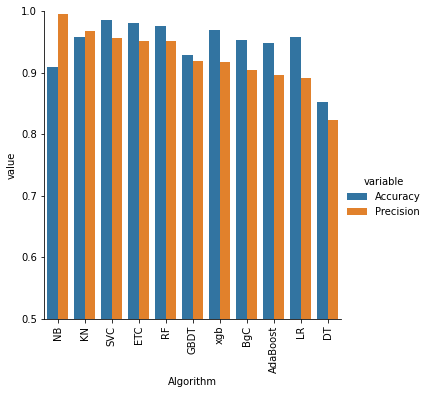

In [81]:
plt.figure(figsize=(20,10))
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### model improve
 1. Change the max_features parameter of TfIdf

In [82]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [83]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [84]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [85]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [87]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.908909,0.995305,0.908909,0.995305,0.908909,0.995305,0.908909,0.995305
1,KN,0.957958,0.967626,0.957958,0.967626,0.957958,0.967626,0.957958,0.967626
2,SVC,0.984985,0.955556,0.984985,0.955556,0.984985,0.955556,0.984985,0.955556
3,ETC,0.979980,0.951923,0.979980,0.951923,0.979980,0.951923,0.979980,0.951923
4,RF,0.975976,0.951299,0.975976,0.951299,0.975976,0.951299,0.975976,0.951299
5,GBDT,0.927928,0.919708,0.927928,0.919708,0.927928,0.919708,0.927928,0.919708
6,xgb,0.968969,0.916923,0.968969,0.916923,0.968969,0.916923,0.968969,0.916923
7,BgC,0.952953,0.904762,0.952953,0.904762,0.952953,0.904762,0.952953,0.904762
8,AdaBoost,0.947948,0.895570,0.947948,0.895570,0.947948,0.895570,0.947948,0.895570
9,LR,0.957958,0.891566,0.957958,0.891566,0.957958,0.891566,0.957958,0.891566


In [88]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [89]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [90]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [91]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.988988988988989
Precision 0.9801980198019802


In [92]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [93]:
from sklearn.ensemble import StackingClassifier

In [94]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [95]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.98998998998999
Precision 0.9771241830065359


In [96]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
Tfidf=TfidfVectorizer()

In [97]:
import pickle
pickle.dump(Tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))